In [80]:
from pycaret.nlp import *
import pandas as pd

data = pd.read_csv('final_dateset.csv')[[
    'index',
    'processed_text', 
    'cosine_constitution', 
    'cosine_crpc', 
    'cosine_ipc', 
    'label',
    'split'
]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9267 entries, 0 to 9266
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                9267 non-null   int64  
 1   processed_text       9267 non-null   object 
 2   cosine_constitution  4445 non-null   float64
 3   cosine_crpc          1728 non-null   float64
 4   cosine_ipc           1963 non-null   float64
 5   label                9267 non-null   int64  
 6   split                9267 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 506.9+ KB


In [81]:
data

,index,processed_text,cosine_constitution,cosine_crpc,cosine_ipc,label,split
0,0,F NARIMAN J Leave granted In 2008 the Punjab ...,-0.002071,NaN,NaN,1,train
1,0,F NARIMAN J Leave granted In 2008 the Punjab ...,0.023084,NaN,NaN,1,train
2,1,S THAKUR J Leave granted These appeals are di...,-0.000097,NaN,NaN,0,train
3,1,S THAKUR J Leave granted These appeals are di...,-0.057426,NaN,NaN,0,train
4,1,S THAKUR J Leave granted These appeals are di...,0.074991,NaN,NaN,0,train
...,...,...,...,...,...,...,...
9262,6071,civil appellate jurisdiction civil appeal numb...,NaN,NaN,NaN,1,dev
9263,6072,criminal appellate jurisdiction special leave\...,NaN,NaN,NaN,0,dev
9264,6073,civil appellate jurisdiction civil appeal numb...,NaN,NaN,NaN,0,dev
9265,6074,civil appellate jurisdiction civil appeal numb...,NaN,NaN,NaN,1,dev


In [82]:
nlp = setup(data = data, target = 'processed_text', session_id = 1, verbose=True)

Description,Value
session_id,1
Documents,9267
Vocab Size,93839
Custom Stopwords,False


In [83]:
lda = create_model('lda', multi_core = True, num_topics=4)
lda_data = pd.read_csv('lda_final_dataset.csv')

In [84]:
lda_data = assign_model(lda)
lda_data.head()

,index,processed_text,cosine_constitution,cosine_crpc,cosine_ipc,label,split,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,0,leave grant punjab state issue numberice invit...,-0.002071,NaN,NaN,1,train,0.046797,0.020018,0.079641,0.853544,Topic 3,0.85
1,0,leave grant punjab state issue numberice invit...,0.023084,NaN,NaN,1,train,0.046794,0.020017,0.079643,0.853546,Topic 3,0.85
2,1,leave grant appeal direct order date pass high...,-0.000097,NaN,NaN,0,train,0.000135,0.000144,0.423922,0.575799,Topic 3,0.58
3,1,leave grant appeal direct order date pass high...,-0.057426,NaN,NaN,0,train,0.000135,0.000154,0.423934,0.575777,Topic 3,0.58
4,1,leave grant appeal direct order date pass high...,0.074991,NaN,NaN,0,train,0.000135,0.000148,0.423927,0.575790,Topic 3,0.58


In [85]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [86]:
lda_data.to_csv('lda_final_dataset.csv', index=False)

In [87]:
lda_data

,index,processed_text,cosine_constitution,cosine_crpc,cosine_ipc,label,split,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,0,leave grant punjab state issue numberice invit...,-0.002071,NaN,NaN,1,train,0.046797,0.020018,0.079641,0.853544,Topic 3,0.85
1,0,leave grant punjab state issue numberice invit...,0.023084,NaN,NaN,1,train,0.046794,0.020017,0.079643,0.853546,Topic 3,0.85
2,1,leave grant appeal direct order date pass high...,-0.000097,NaN,NaN,0,train,0.000135,0.000144,0.423922,0.575799,Topic 3,0.58
3,1,leave grant appeal direct order date pass high...,-0.057426,NaN,NaN,0,train,0.000135,0.000154,0.423934,0.575777,Topic 3,0.58
4,1,leave grant appeal direct order date pass high...,0.074991,NaN,NaN,0,train,0.000135,0.000148,0.423927,0.575790,Topic 3,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9262,6071,civil appellate jurisdiction civil appeal numb...,NaN,NaN,NaN,1,dev,0.000372,0.000382,0.000377,0.998868,Topic 3,1.00
9263,6072,jurisdiction petition crl number judgment orde...,NaN,NaN,NaN,0,dev,0.080218,0.649152,0.002814,0.267816,Topic 1,0.65
9264,6073,civil appellate jurisdiction civil appeal numb...,NaN,NaN,NaN,0,dev,0.000401,0.000405,0.000412,0.998781,Topic 3,1.00
9265,6074,civil appellate jurisdiction civil appeal numb...,NaN,NaN,NaN,1,dev,0.000353,0.000360,0.015276,0.984012,Topic 3,0.98


In [88]:
from pycaret.classification import *

In [89]:
train = lda_data[lda_data['split'] == 'train']
dev = lda_data[lda_data['split'] == 'dev']
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8195
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                8196 non-null   int64  
 1   processed_text       8196 non-null   object 
 2   cosine_constitution  4445 non-null   float64
 3   cosine_crpc          1676 non-null   float64
 4   cosine_ipc           1846 non-null   float64
 5   label                8196 non-null   int64  
 6   split                8196 non-null   object 
 7   Topic_0              8196 non-null   float32
 8   Topic_1              8196 non-null   float32
 9   Topic_2              8196 non-null   float32
 10  Topic_3              8196 non-null   float32
 11  Dominant_Topic       8196 non-null   object 
 12  Perc_Dominant_Topic  8196 non-null   float64
dtypes: float32(4), float64(4), int64(2), object(3)
memory usage: 768.4+ KB


In [90]:
train['cosine_crpc'] = train['cosine_crpc'].fillna(-999)
train['cosine_ipc'] = train['cosine_ipc'].fillna(-999)
train['cosine_constitution'] = train['cosine_constitution'].fillna(-999)


dev['cosine_crpc'] = dev['cosine_crpc'].fillna(-999)
dev['cosine_ipc'] = dev['cosine_ipc'].fillna(-999)
dev['cosine_constitution'] = dev['cosine_constitution'].fillna(-999)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8195
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                8196 non-null   int64  
 1   processed_text       8196 non-null   object 
 2   cosine_constitution  8196 non-null   float64
 3   cosine_crpc          8196 non-null   float64
 4   cosine_ipc           8196 non-null   float64
 5   label                8196 non-null   int64  
 6   split                8196 non-null   object 
 7   Topic_0              8196 non-null   float32
 8   Topic_1              8196 non-null   float32
 9   Topic_2              8196 non-null   float32
 10  Topic_3              8196 non-null   float32
 11  Dominant_Topic       8196 non-null   object 
 12  Perc_Dominant_Topic  8196 non-null   float64
dtypes: float32(4), float64(4), int64(2), object(3)
memory usage: 768.4+ KB


In [97]:
lda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9267 entries, 0 to 9266
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                9267 non-null   int64  
 1   processed_text       9267 non-null   object 
 2   cosine_constitution  4445 non-null   float64
 3   cosine_crpc          1728 non-null   float64
 4   cosine_ipc           1963 non-null   float64
 5   label                9267 non-null   int64  
 6   split                9267 non-null   object 
 7   Topic_0              9267 non-null   float32
 8   Topic_1              9267 non-null   float32
 9   Topic_2              9267 non-null   float32
 10  Topic_3              9267 non-null   float32
 11  Dominant_Topic       9267 non-null   object 
 12  Perc_Dominant_Topic  9267 non-null   float64
dtypes: float32(4), float64(4), int64(2), object(3)
memory usage: 796.5+ KB


In [98]:
lda_data_train = lda_data.copy()

lda_data_train['cosine_crpc'] = lda_data_train['cosine_crpc'].fillna(-999)
lda_data_train['cosine_ipc'] = lda_data_train['cosine_ipc'].fillna(-999)
lda_data_train['cosine_constitution'] = lda_data_train['cosine_constitution'].fillna(-999)
lda_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9267 entries, 0 to 9266
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                9267 non-null   int64  
 1   processed_text       9267 non-null   object 
 2   cosine_constitution  9267 non-null   float64
 3   cosine_crpc          9267 non-null   float64
 4   cosine_ipc           9267 non-null   float64
 5   label                9267 non-null   int64  
 6   split                9267 non-null   object 
 7   Topic_0              9267 non-null   float32
 8   Topic_1              9267 non-null   float32
 9   Topic_2              9267 non-null   float32
 10  Topic_3              9267 non-null   float32
 11  Dominant_Topic       9267 non-null   object 
 12  Perc_Dominant_Topic  9267 non-null   float64
dtypes: float32(4), float64(4), int64(2), object(3)
memory usage: 796.5+ KB


In [99]:
model = setup(data = lda_data_train.drop(['processed_text', 'split'], axis=1), target = 'label', use_gpu=True, ignore_features=['index'], data_split_stratify=True, train_size=0.8, fold_shuffle=True)

,Description,Value
0,session_id,6956
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9267, 11)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [100]:
train['label'].value_counts(normalize=True)

0    0.6347
1    0.3653
Name: label, dtype: float64

In [94]:
train.head()['processed_text']

0    leave grant punjab state issue numberice invit...
1    leave grant punjab state issue numberice invit...
2    leave grant appeal direct order date pass high...
3    leave grant appeal direct order date pass high...
4    leave grant appeal direct order date pass high...
Name: processed_text, dtype: object

In [101]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7343,0.8117,0.5926,0.6724,0.6295,0.4237,0.4261,1.1620
rf,Random Forest Classifier,0.7282,0.8010,0.5526,0.6765,0.6076,0.4030,0.4083,0.9860
xgboost,Extreme Gradient Boosting,0.7104,0.7756,0.5037,0.6572,0.5700,0.3573,0.3648,0.3170
lightgbm,Light Gradient Boosting Machine,0.7009,0.7699,0.4128,0.6768,0.5121,0.3146,0.3348,0.6370
catboost,CatBoost Classifier,0.7013,0.7632,0.3841,0.6983,0.4945,0.3072,0.3354,3.1030
gbc,Gradient Boosting Classifier,0.6588,0.7015,0.1996,0.6839,0.3076,0.1633,0.2187,1.1550
dt,Decision Tree Classifier,0.7081,0.6895,0.6114,0.6187,0.6146,0.3798,0.3801,0.0760
knn,K Neighbors Classifier,0.6313,0.6668,0.4496,0.5194,0.4816,0.1979,0.1993,0.2350
ada,Ada Boost Classifier,0.6378,0.6586,0.2223,0.5706,0.3164,0.1311,0.1596,0.3360
lda,Linear Discriminant Analysis,0.6188,0.5995,0.1073,0.5029,0.1764,0.0483,0.0735,0.0340


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6956, verbose=0,
                     warm_start=False)

In [102]:
top3 = compare_models(sort='f1', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7343,0.8117,0.5926,0.6724,0.6295,0.4237,0.4261,1.1820
dt,Decision Tree Classifier,0.7081,0.6895,0.6114,0.6187,0.6146,0.3798,0.3801,0.0750
rf,Random Forest Classifier,0.7282,0.8010,0.5526,0.6765,0.6076,0.4030,0.4083,1.0050
xgboost,Extreme Gradient Boosting,0.7104,0.7756,0.5037,0.6572,0.5700,0.3573,0.3648,0.2510
nb,Naive Bayes,0.4453,0.5825,0.9211,0.4009,0.5586,0.0588,0.1078,0.0110
lightgbm,Light Gradient Boosting Machine,0.7009,0.7699,0.4128,0.6768,0.5121,0.3146,0.3348,0.4250
catboost,CatBoost Classifier,0.7013,0.7632,0.3841,0.6983,0.4945,0.3072,0.3354,3.0880
knn,K Neighbors Classifier,0.6313,0.6668,0.4496,0.5194,0.4816,0.1979,0.1993,0.2450
qda,Quadratic Discriminant Analysis,0.4537,0.5069,0.7033,0.3234,0.4200,0.0007,0.0171,0.0170
ada,Ada Boost Classifier,0.6378,0.6586,0.2223,0.5706,0.3164,0.1311,0.1596,0.3100


In [165]:
et_f1 = create_model('et')
dt_f1 = create_model('dt')
rf_f1 = create_model('rf')

calibrated_top3 = [
    calibrate_model(et_f1, method='isotonic'), 
    calibrate_model(dt_f1, method='isotonic'), 
    calibrate_model(rf_f1, method='isotonic')
    ]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7358,0.8036,0.4170,0.7919,0.5463,0.3843,0.4237
1,0.7264,0.7922,0.4417,0.7353,0.5519,0.3721,0.3972
2,0.7318,0.7821,0.5124,0.7039,0.5930,0.4004,0.4116
3,0.7368,0.7983,0.4610,0.7514,0.5714,0.3969,0.4216
4,0.7301,0.7976,0.4645,0.7278,0.5671,0.3846,0.4051
5,0.7260,0.7825,0.4681,0.7135,0.5653,0.3777,0.3956
6,0.7490,0.8290,0.5142,0.7474,0.6092,0.4335,0.4500
7,0.7220,0.8031,0.4362,0.7235,0.5442,0.3615,0.3854
8,0.7301,0.8024,0.5124,0.7005,0.5918,0.3974,0.4082


In [161]:
blender_soft = blend_models(top3, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7318,0.8148,0.5654,0.6780,0.6166,0.4129,0.4170
1,0.7129,0.7987,0.5795,0.6357,0.6063,0.3812,0.3822
2,0.6941,0.7817,0.6007,0.5986,0.5996,0.3521,0.3521
3,0.7530,0.8314,0.6667,0.6787,0.6726,0.4744,0.4744
4,0.7341,0.8090,0.6170,0.6616,0.6385,0.4287,0.4293
5,0.7328,0.8152,0.6277,0.6556,0.6413,0.4286,0.4288
6,0.7220,0.8248,0.6064,0.6429,0.6241,0.4038,0.4043
7,0.7247,0.8138,0.5887,0.6535,0.6194,0.4047,0.4060
8,0.7314,0.8197,0.6431,0.6500,0.6465,0.4300,0.4300


In [166]:
blender_soft = blend_models(calibrated_top3, method = 'soft')
# This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. 
# The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. 
# Custom metrics can be added or removed using add_metric and remove_metric function.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7372,0.8167,0.3958,0.8235,0.5346,0.3815,0.4312
1,0.7305,0.8047,0.4240,0.7643,0.5455,0.3755,0.4084
2,0.7332,0.7927,0.4735,0.7322,0.5751,0.3934,0.4133
3,0.7476,0.8226,0.4574,0.7914,0.5798,0.4173,0.4494
4,0.7274,0.8058,0.4255,0.7500,0.5430,0.3692,0.3993
5,0.7368,0.8018,0.4574,0.7544,0.5695,0.3960,0.4217
6,0.7422,0.8357,0.4539,0.7758,0.5727,0.4057,0.4356
7,0.7368,0.8220,0.4468,0.7636,0.5638,0.3933,0.4223
8,0.7503,0.8133,0.5053,0.7606,0.6072,0.4349,0.4545


In [106]:
blender_hard = blend_models(top3, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7399,0.0000,0.5265,0.7163,0.6069,0.4193,0.4304
1,0.7264,0.0000,0.5689,0.6653,0.6133,0.4036,0.4066
2,0.7156,0.0000,0.5972,0.6353,0.6157,0.3903,0.3908
3,0.7571,0.0000,0.5922,0.7198,0.6498,0.4665,0.4717
4,0.7368,0.0000,0.5851,0.6790,0.6286,0.4265,0.4294
5,0.7449,0.0000,0.5709,0.7031,0.6301,0.4387,0.4442
6,0.7463,0.0000,0.6064,0.6895,0.6453,0.4491,0.4513
7,0.7314,0.0000,0.5638,0.6766,0.6151,0.4115,0.4155
8,0.7449,0.0000,0.6184,0.6836,0.6494,0.4497,0.4511


In [163]:
blender_hard = blend_models(calibrated_top3, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7358,0.0000,0.3958,0.8175,0.5333,0.3788,0.4273
1,0.7264,0.0000,0.4205,0.7532,0.5397,0.3666,0.3981
2,0.7358,0.0000,0.4806,0.7351,0.5812,0.4004,0.4197
3,0.7490,0.0000,0.4610,0.7927,0.5830,0.4209,0.4525
4,0.7274,0.0000,0.4291,0.7469,0.5450,0.3701,0.3991
5,0.7355,0.0000,0.4504,0.7560,0.5644,0.3915,0.4186
6,0.7490,0.0000,0.4823,0.7727,0.5939,0.4260,0.4508
7,0.7301,0.0000,0.4326,0.7531,0.5495,0.3764,0.4058
8,0.7436,0.0000,0.5088,0.7385,0.6025,0.4226,0.4386


In [108]:
best_blend = blend_models(top3, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7318,0.8148,0.5654,0.6780,0.6166,0.4129,0.4170
1,0.7129,0.7987,0.5795,0.6357,0.6063,0.3812,0.3822
2,0.6941,0.7817,0.6007,0.5986,0.5996,0.3521,0.3521
3,0.7530,0.8314,0.6667,0.6787,0.6726,0.4744,0.4744
4,0.7341,0.8090,0.6170,0.6616,0.6385,0.4287,0.4293
5,0.7328,0.8152,0.6277,0.6556,0.6413,0.4286,0.4288
6,0.7220,0.8248,0.6064,0.6429,0.6241,0.4038,0.4043
7,0.7247,0.8138,0.5887,0.6535,0.6194,0.4047,0.4060
8,0.7314,0.8197,0.6431,0.6500,0.6465,0.4300,0.4300


In [177]:
best_blend = blend_models(calibrated_top3, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7372,0.8167,0.3958,0.8235,0.5346,0.3815,0.4312
1,0.7305,0.8047,0.4240,0.7643,0.5455,0.3755,0.4084
2,0.7332,0.7927,0.4735,0.7322,0.5751,0.3934,0.4133
3,0.7476,0.8226,0.4574,0.7914,0.5798,0.4173,0.4494
4,0.7274,0.8058,0.4255,0.7500,0.5430,0.3692,0.3993
5,0.7368,0.8018,0.4574,0.7544,0.5695,0.3960,0.4217
6,0.7422,0.8357,0.4539,0.7758,0.5727,0.4057,0.4356
7,0.7368,0.8220,0.4468,0.7636,0.5638,0.3933,0.4223
8,0.7503,0.8133,0.5053,0.7606,0.6072,0.4349,0.4545


In [181]:
stacker_prime = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7507,0.8202,0.5194,0.7500,0.6138,0.4385,0.4547
1,0.7345,0.8084,0.5618,0.6853,0.6175,0.4172,0.4220
2,0.7305,0.7994,0.6078,0.6590,0.6324,0.4201,0.4210
3,0.7611,0.8243,0.5922,0.7293,0.6536,0.4743,0.4803
4,0.7328,0.8124,0.5674,0.6780,0.6178,0.4148,0.4187
5,0.7368,0.8121,0.5532,0.6933,0.6154,0.4192,0.4254
6,0.7503,0.8339,0.5851,0.7082,0.6408,0.4521,0.4569
7,0.7395,0.8235,0.5674,0.6926,0.6238,0.4276,0.4326
8,0.7530,0.8228,0.6184,0.7000,0.6567,0.4650,0.4672


In [182]:
stacker_calibrated_prime = stack_models(calibrated_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7399,0.8213,0.4594,0.7647,0.5740,0.4031,0.4302
1,0.7197,0.8058,0.4806,0.6904,0.5667,0.3692,0.3824
2,0.7210,0.7933,0.5406,0.6652,0.5965,0.3868,0.3916
3,0.7530,0.8199,0.5284,0.7487,0.6195,0.4447,0.4595
4,0.7247,0.8076,0.4858,0.6990,0.5732,0.3796,0.3933
5,0.7382,0.8019,0.5106,0.7200,0.5975,0.4117,0.4251
6,0.7355,0.8330,0.5284,0.7028,0.6032,0.4108,0.4202
7,0.7328,0.8218,0.5035,0.7100,0.5892,0.3996,0.4125
8,0.7449,0.8174,0.5689,0.7061,0.6301,0.4389,0.4449


In [112]:
stacker = stack_models(top3, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7148,0.8034,0.5080,0.6644,0.5757,0.3666,0.3741
1,0.7276,0.7941,0.5823,0.6620,0.6196,0.4088,0.4108
2,0.7336,0.8023,0.5451,0.6906,0.6093,0.4115,0.4181
3,0.7328,0.8179,0.5558,0.6841,0.6133,0.4125,0.4177
4,0.7281,0.8013,0.5823,0.6633,0.6202,0.4098,0.4119
Mean,0.7274,0.8038,0.5547,0.6729,0.6076,0.4018,0.4065
Std,0.0068,0.0078,0.0276,0.0120,0.0164,0.0177,0.0165


In [113]:
stacker = stack_models(calibrated_top3, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.7984,0.5133,0.6792,0.5847,0.3820,0.3904
1,0.7229,0.7894,0.5735,0.6559,0.6119,0.3979,0.4000
2,0.7269,0.7948,0.5310,0.6818,0.5970,0.3953,0.4024
3,0.7267,0.8162,0.5487,0.6739,0.6049,0.3993,0.4043
4,0.7348,0.7933,0.5876,0.6748,0.6282,0.4236,0.4261
Mean,0.7267,0.7984,0.5508,0.6731,0.6053,0.3996,0.4046
Std,0.0045,0.0094,0.0271,0.0091,0.0146,0.0135,0.0117


In [114]:
stacker_predict = stack_models(top3, method = 'predict')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7385,0.7886,0.5194,0.7171,0.6025,0.4150,0.4270
1,0.7358,0.7755,0.5689,0.6851,0.6216,0.4214,0.4257
2,0.7156,0.7556,0.5901,0.6374,0.6128,0.3887,0.3894
3,0.7557,0.8070,0.5816,0.7225,0.6444,0.4617,0.4680
4,0.7328,0.7899,0.5745,0.6750,0.6207,0.4165,0.4197
5,0.7409,0.7994,0.5567,0.7009,0.6206,0.4277,0.4343
6,0.7449,0.8017,0.6028,0.6883,0.6427,0.4457,0.4481
7,0.7341,0.7863,0.5638,0.6824,0.6175,0.4166,0.4210
8,0.7395,0.7846,0.5936,0.6829,0.6352,0.4342,0.4368


In [179]:
stacker_predict = stack_models(calibrated_top3, method = 'predict')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7358,0.7711,0.4382,0.7702,0.5586,0.3898,0.4213
1,0.7224,0.7810,0.4594,0.7104,0.5579,0.3689,0.3875
2,0.7224,0.7671,0.5477,0.6652,0.6008,0.3910,0.3954
3,0.7571,0.8193,0.5284,0.7602,0.6234,0.4526,0.4689
4,0.7126,0.7694,0.4752,0.6734,0.5572,0.3536,0.3654
5,0.7395,0.7863,0.4823,0.7432,0.5849,0.4075,0.4277
6,0.7382,0.8127,0.5177,0.7157,0.6008,0.4134,0.4254
7,0.7301,0.7901,0.5142,0.6971,0.5918,0.3970,0.4073
8,0.7395,0.7899,0.5477,0.7045,0.6163,0.4238,0.4315


In [117]:
re_stacker = stack_models(top3, restack = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7439,0.8229,0.5053,0.7409,0.6008,0.4221,0.4389
1,0.7264,0.8075,0.5371,0.6786,0.5996,0.3961,0.4023
2,0.7237,0.7999,0.5866,0.6535,0.6182,0.4028,0.4042
3,0.7584,0.8231,0.5922,0.7229,0.6511,0.4691,0.4746
4,0.7355,0.8119,0.5638,0.6853,0.6187,0.4191,0.4238
5,0.7503,0.8099,0.5532,0.7256,0.6278,0.4450,0.4543
6,0.7490,0.8328,0.5816,0.7069,0.6381,0.4488,0.4538
7,0.7368,0.8217,0.5567,0.6916,0.6169,0.4200,0.4258
8,0.7571,0.8219,0.6219,0.7068,0.6617,0.4734,0.4757


In [180]:
re_stacker = stack_models(calibrated_top3, restack = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7412,0.8221,0.4523,0.7758,0.5714,0.4040,0.4342
1,0.7210,0.8057,0.4735,0.6979,0.5642,0.3699,0.3850
2,0.7278,0.7959,0.5406,0.6800,0.6024,0.3995,0.4055
3,0.7557,0.8243,0.5284,0.7563,0.6221,0.4499,0.4657
4,0.7179,0.8069,0.4681,0.6911,0.5581,0.3621,0.3769
5,0.7409,0.8039,0.5000,0.7344,0.5949,0.4144,0.4309
6,0.7395,0.8337,0.5213,0.7171,0.6037,0.4169,0.4286
7,0.7314,0.8242,0.5106,0.7024,0.5914,0.3987,0.4100
8,0.7449,0.8210,0.5548,0.7136,0.6243,0.4357,0.4437


In [121]:
top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=6956, verbose=0,
                      warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=6956, splitter='best'),
 RandomForestClassifier(boo

In [129]:
stacker_prime.final_estimator
# This function trains a meta-model over select estimators passed in the estimator_list parameter. 
# The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. 
# Custom metrics can be added or removed using add_metric and remove_metric function.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6956, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
stacker_prime.final_estimator

In [135]:
optimized_top3 = []
for opt in calibrated_top3:
    optimized_top3.append(optimize_threshold(opt))

In [136]:
stacker_prime = stack_models(optimized_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7412,0.8214,0.5230,0.7220,0.6066,0.4210,0.4332
1,0.7210,0.8046,0.5442,0.6638,0.5981,0.3876,0.3921
2,0.7089,0.7886,0.5901,0.6255,0.6073,0.3763,0.3767
3,0.7517,0.8166,0.5709,0.7188,0.6364,0.4516,0.4585
4,0.7220,0.8060,0.5532,0.6610,0.6023,0.3912,0.3949
5,0.7395,0.8000,0.5461,0.7032,0.6148,0.4227,0.4304
6,0.7409,0.8320,0.5816,0.6891,0.6308,0.4334,0.4371
7,0.7274,0.8191,0.5390,0.6786,0.6008,0.3979,0.4040
8,0.7436,0.8162,0.6184,0.6809,0.6481,0.4472,0.4485


In [186]:
et = create_model('et', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7426,0.8229,0.5618,0.7035,0.6248,0.4326,0.4389
1,0.7237,0.8044,0.5866,0.6535,0.6182,0.4028,0.4042
2,0.7264,0.8047,0.6254,0.6460,0.6355,0.4167,0.4168
3,0.7530,0.8199,0.6099,0.7020,0.6528,0.4626,0.4653
4,0.7206,0.8025,0.5709,0.6518,0.6087,0.3930,0.3950
5,0.7463,0.8015,0.5745,0.7043,0.6328,0.4420,0.4474
6,0.7517,0.8355,0.6206,0.6944,0.6554,0.4623,0.4641
7,0.7328,0.8191,0.5851,0.6707,0.6250,0.4189,0.4213
8,0.7382,0.8227,0.6290,0.6667,0.6473,0.4394,0.4399


In [188]:
calibrated_et = calibrate_model(et, method='isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7318,0.8220,0.3887,0.8088,0.5251,0.3688,0.4169
1,0.7264,0.8025,0.4382,0.7381,0.5499,0.3712,0.3973
2,0.7278,0.7977,0.4841,0.7098,0.5756,0.3856,0.4009
3,0.7584,0.8190,0.4823,0.8047,0.6031,0.4447,0.4749
4,0.7112,0.8006,0.4043,0.7125,0.5158,0.3317,0.3588
5,0.7422,0.8017,0.4468,0.7826,0.5688,0.4040,0.4363
6,0.7409,0.8282,0.4787,0.7500,0.5844,0.4092,0.4310
7,0.7355,0.8205,0.4610,0.7471,0.5702,0.3942,0.4182
8,0.7436,0.8246,0.5194,0.7313,0.6074,0.4251,0.4388


In [147]:
calibrated_et_opt = optimize_threshold(et)

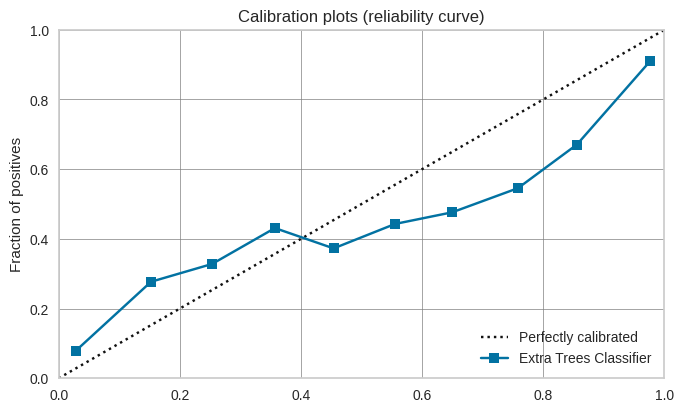

In [148]:
plot_model(et, plot='calibration')

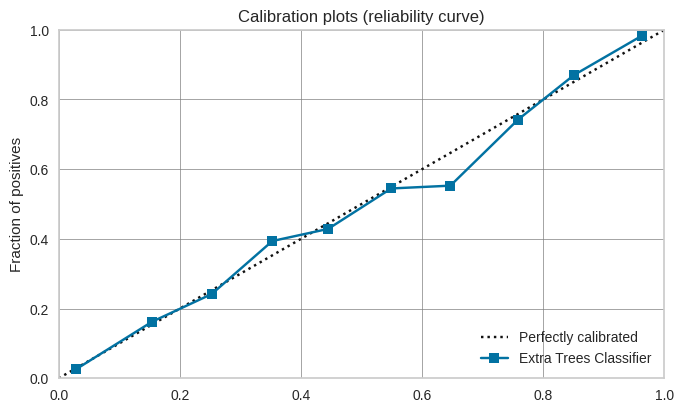

In [158]:
plot_model(calibrated_et, plot='calibration')

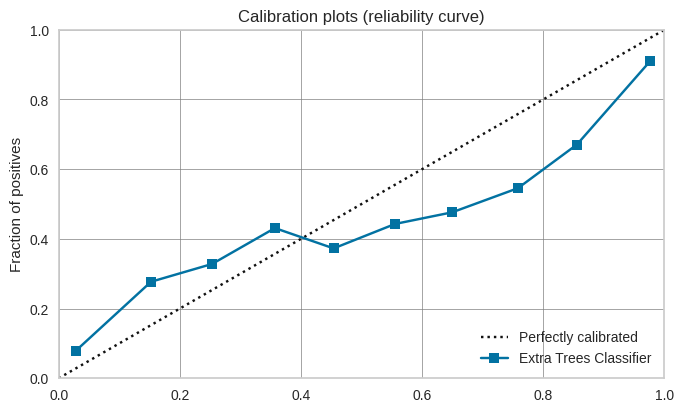

In [150]:
plot_model(calibrated_et_opt, plot='calibration')

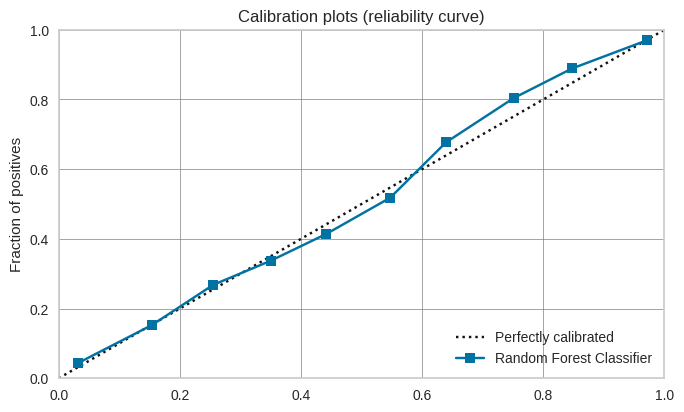

In [176]:
plot_model(calibrated_top3[2], plot='calibration')

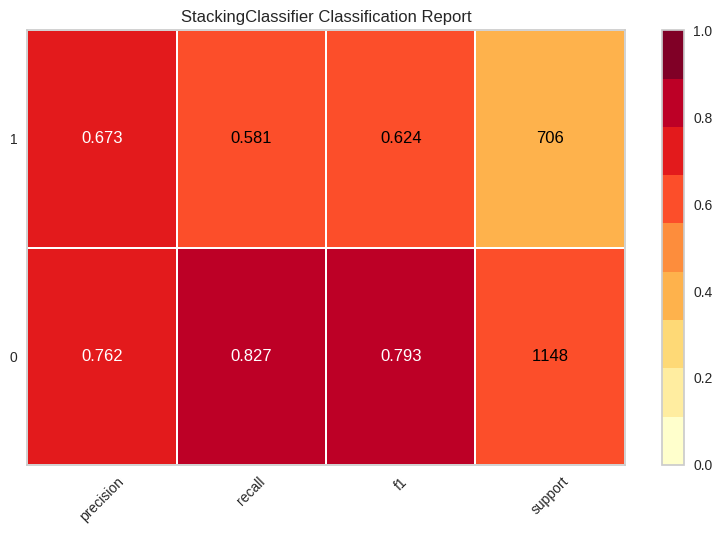

In [183]:
plot_model(stacker_prime, plot='class_report') 

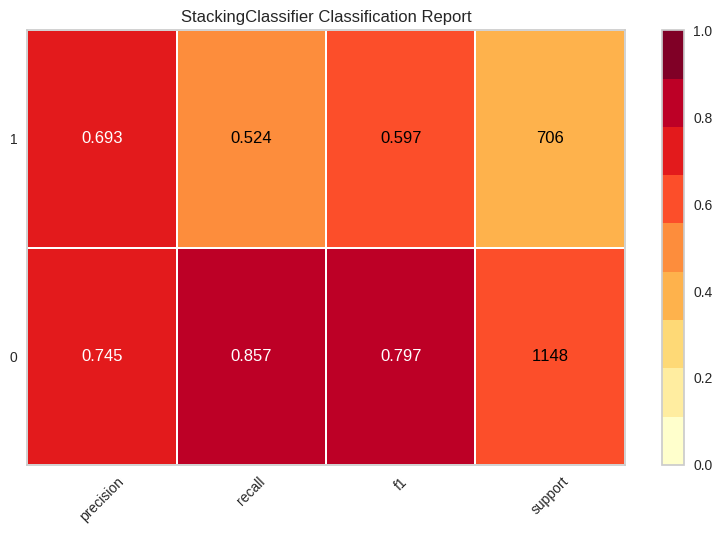

In [185]:
plot_model(stacker_calibrated_prime, plot='class_report') 

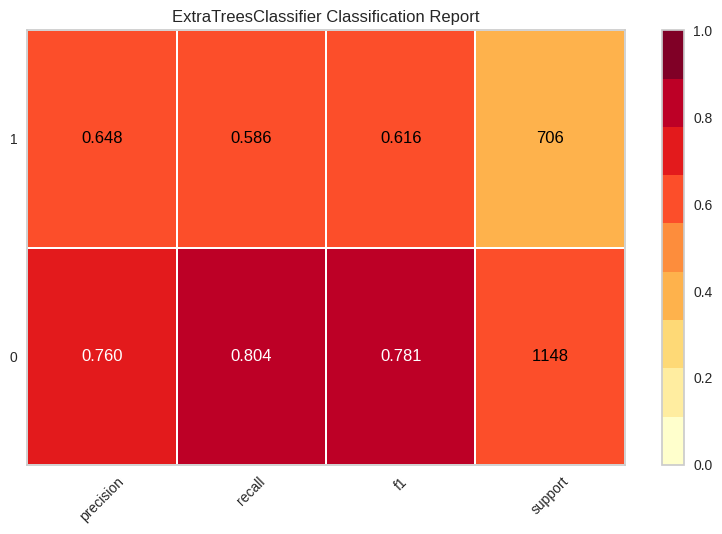

In [187]:
plot_model(et, plot='class_report')

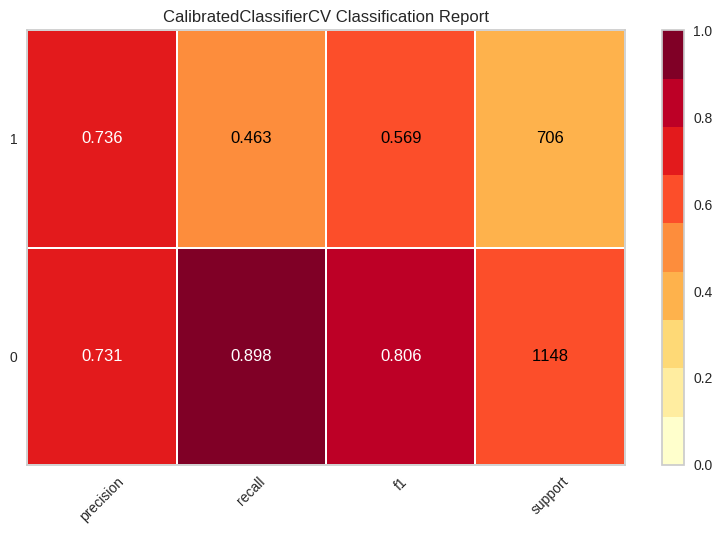

In [189]:
plot_model(calibrated_et, plot='class_report')

In [232]:
get_config('X_test')

,cosine_constitution,cosine_crpc,cosine_ipc,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,label
457,-0.101787,-999.000000,-999.000000,0.001060,0.000067,0.078062,0.920811,0.92,0.0,0.0,0.0,1.0,1
7537,-0.052895,-999.000000,-999.000000,0.054419,0.476009,0.126036,0.343536,0.48,0.0,1.0,0.0,0.0,0
6384,0.027554,-0.000433,-999.000000,0.026167,0.108493,0.088267,0.777073,0.78,0.0,0.0,0.0,1.0,1
5605,-999.000000,-0.096937,-0.044178,0.000322,0.999042,0.000317,0.000319,1.00,0.0,1.0,0.0,0.0,0
4655,0.028142,0.028187,-999.000000,0.000264,0.609246,0.102401,0.288088,0.61,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920,-999.000000,-999.000000,-999.000000,0.000516,0.000506,0.000513,0.998464,1.00,0.0,0.0,0.0,1.0,0
8502,-999.000000,-999.000000,-999.000000,0.000258,0.000261,0.007124,0.992357,0.99,0.0,0.0,0.0,1.0,1
2687,-0.006214,0.041286,-999.000000,0.013834,0.037376,0.260677,0.688112,0.69,0.0,0.0,0.0,1.0,0
8010,-999.000000,-999.000000,-999.000000,0.000656,0.000678,0.000659,0.998007,1.00,0.0,0.0,0.0,1.0,1


In [236]:
get_config('X_test')

,cosine_constitution,cosine_crpc,cosine_ipc,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,label,et_prediction
457,-0.101787,-999.000000,-999.000000,0.001060,0.000067,0.078062,0.920811,0.92,0.0,0.0,0.0,1.0,1,1
7537,-0.052895,-999.000000,-999.000000,0.054419,0.476009,0.126036,0.343536,0.48,0.0,1.0,0.0,0.0,0,0
6384,0.027554,-0.000433,-999.000000,0.026167,0.108493,0.088267,0.777073,0.78,0.0,0.0,0.0,1.0,1,1
5605,-999.000000,-0.096937,-0.044178,0.000322,0.999042,0.000317,0.000319,1.00,0.0,1.0,0.0,0.0,0,0
4655,0.028142,0.028187,-999.000000,0.000264,0.609246,0.102401,0.288088,0.61,0.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920,-999.000000,-999.000000,-999.000000,0.000516,0.000506,0.000513,0.998464,1.00,0.0,0.0,0.0,1.0,0,0
8502,-999.000000,-999.000000,-999.000000,0.000258,0.000261,0.007124,0.992357,0.99,0.0,0.0,0.0,1.0,1,0
2687,-0.006214,0.041286,-999.000000,0.013834,0.037376,0.260677,0.688112,0.69,0.0,0.0,0.0,1.0,0,0
8010,-999.000000,-999.000000,-999.000000,0.000656,0.000678,0.000659,0.998007,1.00,0.0,0.0,0.0,1.0,1,0


In [237]:
xtest = get_config('X_test')
xtest['label'] = get_config('y_test')
xtest['et_prediction'] = et.predict(get_config('X_test').drop(['label', 'et_prediction'], 1))
xtest['stacked_prediction'] = stacker_prime.predict(get_config('X_test').drop(['label', 'et_prediction'], 1))
xtest

,cosine_constitution,cosine_crpc,cosine_ipc,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,label,et_prediction,stacked_prediction
457,-0.101787,-999.000000,-999.000000,0.001060,0.000067,0.078062,0.920811,0.92,0.0,0.0,0.0,1.0,1,1,1
7537,-0.052895,-999.000000,-999.000000,0.054419,0.476009,0.126036,0.343536,0.48,0.0,1.0,0.0,0.0,0,0,0
6384,0.027554,-0.000433,-999.000000,0.026167,0.108493,0.088267,0.777073,0.78,0.0,0.0,0.0,1.0,1,1,1
5605,-999.000000,-0.096937,-0.044178,0.000322,0.999042,0.000317,0.000319,1.00,0.0,1.0,0.0,0.0,0,0,0
4655,0.028142,0.028187,-999.000000,0.000264,0.609246,0.102401,0.288088,0.61,0.0,1.0,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920,-999.000000,-999.000000,-999.000000,0.000516,0.000506,0.000513,0.998464,1.00,0.0,0.0,0.0,1.0,0,0,0
8502,-999.000000,-999.000000,-999.000000,0.000258,0.000261,0.007124,0.992357,0.99,0.0,0.0,0.0,1.0,1,0,0
2687,-0.006214,0.041286,-999.000000,0.013834,0.037376,0.260677,0.688112,0.69,0.0,0.0,0.0,1.0,0,0,0
8010,-999.000000,-999.000000,-999.000000,0.000656,0.000678,0.000659,0.998007,1.00,0.0,0.0,0.0,1.0,1,0,1


In [238]:
xtest.to_csv('lda_xtest_datset.csv')

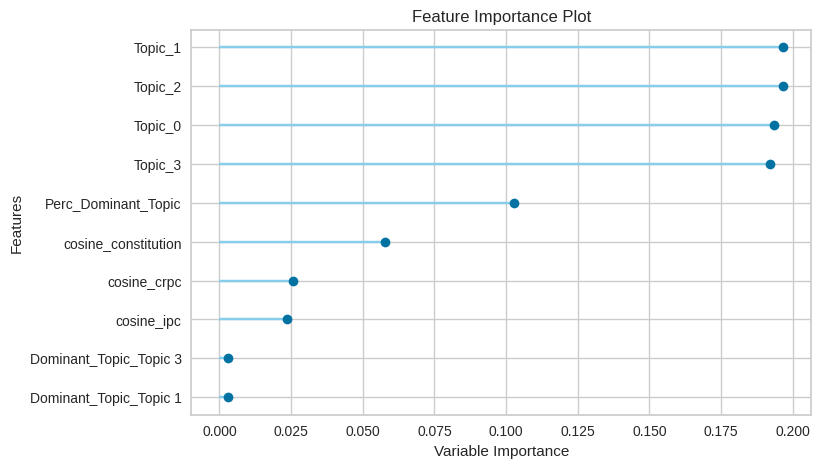

In [239]:
plot_model(et, plot='feature')

In [ ]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 8196 to 9266
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   processed_text       1071 non-null   object 
 1   cosine_constitution  1071 non-null   float64
 2   cosine_crpc          1071 non-null   float64
 3   cosine_ipc           1071 non-null   float64
 4   label                1071 non-null   int64  
 5   split                1071 non-null   object 
 6   Topic_0              1071 non-null   float64
 7   Topic_1              1071 non-null   float64
 8   Topic_2              1071 non-null   float64
 9   Topic_3              1071 non-null   float64
 10  Dominant_Topic       1071 non-null   object 
 11  Perc_Dominant_Topic  1071 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 108.8+ KB


In [ ]:
dev_pred_cal = predict_model(calibrated_et, data=dev)
dev_pred = predict_model(et, data=dev)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5098,0.5089,0.2849,0.5204,0.3682,0.0208,0.0234


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5042,0.5003,0.3408,0.5083,0.4080,0.0093,0.0099


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

f1_score(dev['label'], dev_pred['Score']>0.5), f1_score(dev['label'], dev_pred_cal['Score']>0.5)

(0.6679197994987469, 0.667910447761194)

In [ ]:
dev['label'].value_counts(normalize=True)

1    0.501401
0    0.498599
Name: label, dtype: float64

In [ ]:
confusion_matrix(dev['label'], dev_pred['Score']>0.5)

array([[  8, 526],
       [  4, 533]])

In [190]:
plot_model(stacker_prime, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [ ]:
random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6995,0.7606,0.4959,0.6321,0.5558,0.3338,0.3394
1,0.7165,0.7561,0.5366,0.6535,0.5893,0.3760,0.3802
2,0.6965,0.7388,0.4694,0.6319,0.5386,0.3197,0.3276
3,0.7227,0.7663,0.5347,0.6650,0.5928,0.3862,0.3915
4,0.7304,0.8058,0.5224,0.6882,0.5940,0.3977,0.4062
5,0.6903,0.7377,0.4857,0.6134,0.5421,0.3129,0.3178
6,0.6836,0.7437,0.4653,0.6064,0.5266,0.2951,0.3010
7,0.7253,0.8007,0.5143,0.6811,0.5860,0.3864,0.3950
8,0.7083,0.7789,0.4449,0.6728,0.5356,0.3357,0.3509


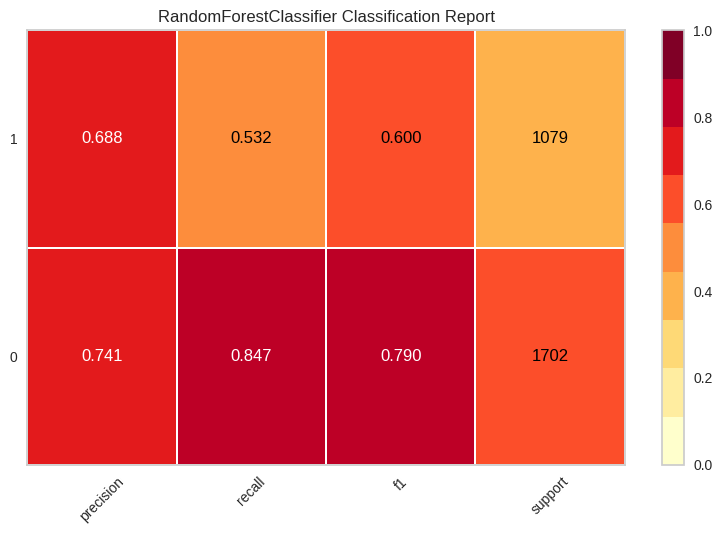

In [ ]:
plot_model(random_forest, plot='class_report')

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6133,0.5891,0.0488,0.4138,0.0873,0.0080,0.0155
1,0.6256,0.5822,0.0488,0.5714,0.0899,0.0322,0.0725
2,0.6210,0.6083,0.0694,0.4857,0.1214,0.0299,0.0533
3,0.6379,0.5656,0.0816,0.6667,0.1455,0.0688,0.1313
4,0.6117,0.5823,0.0653,0.4103,0.1127,0.0100,0.0171
5,0.6148,0.5714,0.0612,0.4286,0.1071,0.0141,0.0252
6,0.6142,0.6068,0.0612,0.4286,0.1071,0.0139,0.0249
7,0.6389,0.6104,0.0531,0.8667,0.1000,0.0589,0.1551
8,0.6188,0.5863,0.0653,0.4706,0.1147,0.0248,0.0449


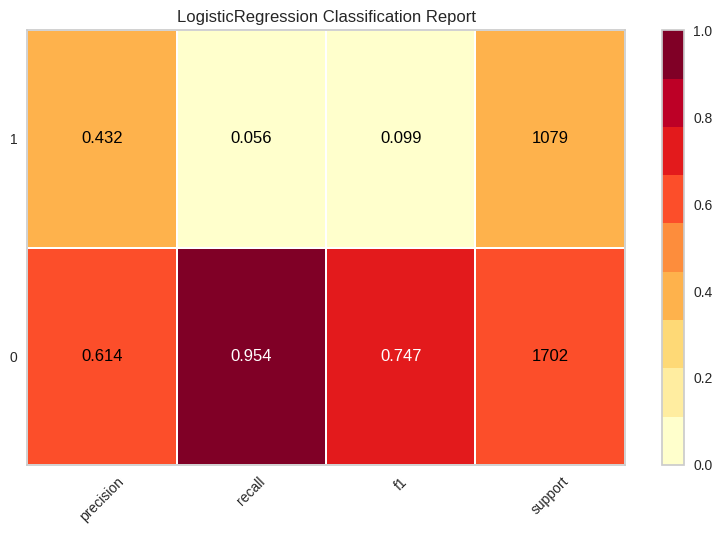

In [ ]:
plot_model(lr, plot='class_report')

In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4561,0.5706,0.9065,0.4033,0.5582,0.0705,0.1198
1,0.4361,0.5575,0.8862,0.3921,0.5436,0.0381,0.0657
2,0.4361,0.6011,0.8816,0.3906,0.5414,0.0381,0.0648
3,0.4515,0.5582,0.8694,0.3966,0.5448,0.0546,0.0865
4,0.4453,0.5617,0.9184,0.3982,0.5556,0.0611,0.1109
5,0.4438,0.5665,0.8816,0.3942,0.5448,0.0481,0.0800
6,0.4352,0.5586,0.8898,0.3914,0.5436,0.0389,0.0678
7,0.4398,0.5896,0.8735,0.3919,0.5411,0.0400,0.0661
8,0.4491,0.5785,0.8857,0.3974,0.5487,0.0559,0.0923


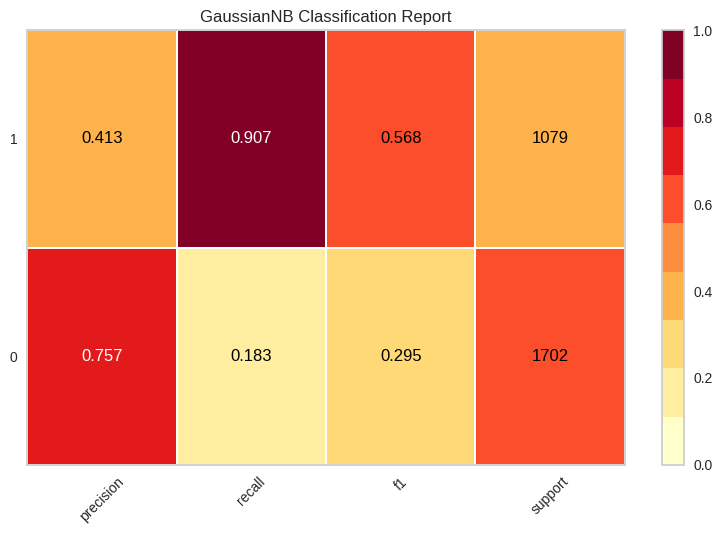

In [ ]:
plot_model(nb, plot='class_report')

In [ ]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7149,0.7589,0.4675,0.6805,0.5542,0.3551,0.3687
1,0.6888,0.7747,0.4715,0.6170,0.5346,0.3070,0.3132
2,0.7011,0.7263,0.4449,0.6527,0.5291,0.3215,0.3341
3,0.7026,0.7562,0.5061,0.6327,0.5624,0.3413,0.3462
4,0.7196,0.7768,0.4531,0.6981,0.5495,0.3591,0.3767
5,0.6949,0.7371,0.4531,0.6343,0.5286,0.3122,0.3219
6,0.7160,0.7461,0.4735,0.6784,0.5577,0.3582,0.3708
7,0.7114,0.7839,0.4776,0.6648,0.5558,0.3505,0.3610
8,0.7145,0.7692,0.4612,0.6807,0.5499,0.3520,0.3663


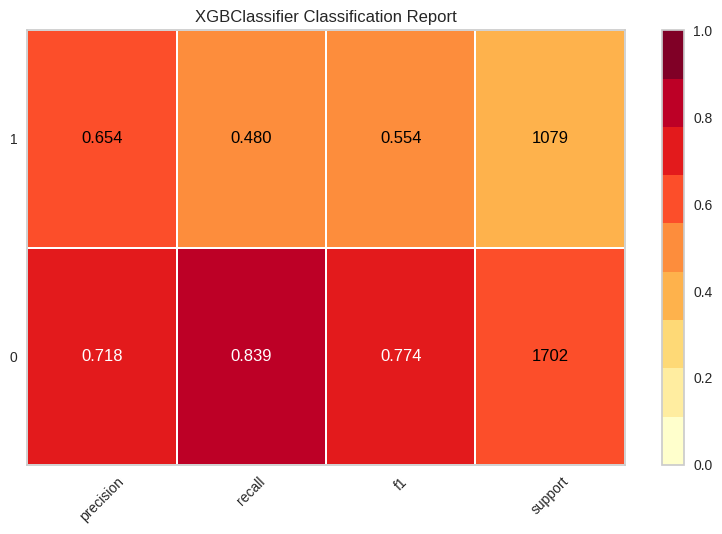

In [ ]:
plot_model(xgboost, plot='class_report')

In [ ]:
tuned_et = tune_model(et, optimize = 'f1', n_iter=1000)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6102,0.6994,0.6504,0.4893,0.5585,0.2218,0.2290
1,0.6302,0.7204,0.6382,0.5097,0.5668,0.2512,0.2560
2,0.6425,0.6936,0.6286,0.5220,0.5704,0.2688,0.2722
3,0.6410,0.7190,0.6327,0.5201,0.5709,0.2673,0.2711
4,0.6425,0.7248,0.5796,0.5240,0.5504,0.2550,0.2559
5,0.6163,0.6806,0.5837,0.4931,0.5346,0.2121,0.2143
6,0.6404,0.6964,0.6735,0.5189,0.5861,0.2776,0.2850
7,0.6481,0.7335,0.6122,0.5300,0.5682,0.2739,0.2759
8,0.6590,0.7072,0.6082,0.5438,0.5742,0.2912,0.2925


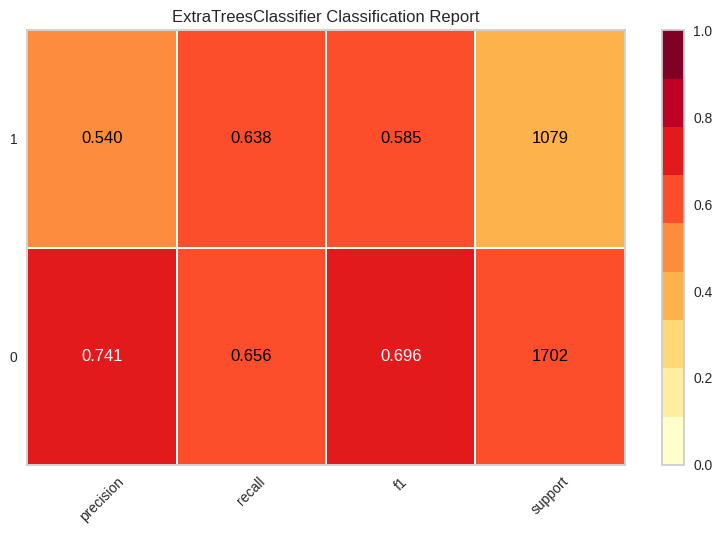

In [ ]:
plot_model(tuned_et, plot='class_report')